# 📊 Predicción de Churn usando el Modelo de Regresión Logística

En este notebook, aplicaremos el modelo de **Regresión Logística** sobre el dataset original de clientes de telecomunicaciones (sin la columna `Churn`)  
para predecir si un cliente abandonará o no el servicio.  
Clasificaremos a los clientes en tres categorías de riesgo de churn: **Alto**, **Medio** y **Bajo**.


In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
import joblib


## 🧼 Limpieza de Datos y Preprocesamiento

A continuación, vamos a realizar una limpieza y preprocesamiento de datos similar al que usamos para entrenar el modelo.  
Esto incluirá la conversión de columnas, el tratamiento de valores nulos y la codificación de variables.


In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
import joblib

# Cargar el modelo previamente entrenado (ruta correcta dentro de la carpeta 'notebooks/modelos/')
modelo = joblib.load('./modelos/logistic_regression_model.pkl')

# 🧪 Cargar dataset
df = pd.read_csv('../data/Telco-Customer-Churn.csv')

# 🔴 Eliminar columna 'Churn' para no saber quién desertó
df_without_churn = df.drop(columns="Churn")

# 💡 Verificar las primeras filas del dataset
print("Primeras filas del dataset:")
print(df_without_churn.head())

# 🧼 1. Limpiar valores nulos
df_without_churn['TotalCharges'] = pd.to_numeric(df_without_churn['TotalCharges'], errors='coerce')
df_without_churn['TotalCharges'].fillna(df_without_churn['TotalCharges'].mean(), inplace=True)

# 🧑‍💻 Verificar que no haya más valores nulos
print(f"Valores nulos en el dataset: {df_without_churn.isnull().sum().sum()}")

# 🧠 2. Codificación de variables categóricas
label_encoder = LabelEncoder()
binary_cols = [col for col in df_without_churn.select_dtypes(include='object').columns.tolist() if df_without_churn[col].nunique() == 2]

for col in binary_cols:
    df_without_churn[col] = label_encoder.fit_transform(df_without_churn[col])

df_without_churn = pd.get_dummies(df_without_churn, drop_first=True)

# 🎨 3. Escalado de variables numéricas
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
df_without_churn[numeric_cols] = scaler.fit_transform(df_without_churn[numeric_cols])

# 4. Asegurarse de que `df_without_churn` tenga las mismas columnas que el modelo
df_without_churn = df_without_churn[modelo.feature_names_in_]

# 5. Realizar la predicción con el modelo cargado
df_without_churn["Probabilidad_Churn"] = modelo.predict_proba(df_without_churn)[:, 1]

# 6. Clasificación en "Alto", "Medio" o "Bajo" riesgo de churn
def clasificar_riesgo(prob):
    if prob > 0.35:
        return "Alto"
    elif prob > 0.25:
        return "Medio"
    else:
        return "Bajo"

df_without_churn["Riesgo_Churn"] = df_without_churn["Probabilidad_Churn"].apply(clasificar_riesgo)

# Resumen: Contamos cuántos clientes están en cada grupo de riesgo
resumen_riesgo = df_without_churn["Riesgo_Churn"].value_counts()

# Mostrar el resumen
print("Resumen de riesgo de churn para todos los clientes:")
print(resumen_riesgo)

# Visualizamos algunos de los resultados para ver la probabilidad y clasificación
df_without_churn[["Probabilidad_Churn", "Riesgo_Churn"]].head(10)


Primeras filas del dataset:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0         

C:\Users\braco\AppData\Local\Temp\ipykernel_14752\1449739693.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_without_churn['TotalCharges'].fillna(df_without_churn['TotalCharges'].mean(), inplace=True)


,Probabilidad_Churn,Riesgo_Churn
0,0.629107,Alto
1,0.046660,Bajo
2,0.301228,Medio
3,0.025631,Bajo
4,0.687732,Alto
5,0.797716,Alto
6,0.479660,Alto
7,0.313410,Medio
8,0.617426,Alto
9,0.009018,Bajo


## 🎯 Aplicación del Modelo de Regresión Logística

Ahora aplicaremos el modelo de **Regresión Logística** previamente entrenado para predecir el churn de los clientes sin la columna `Churn`.  
Clasificaremos a los clientes en tres categorías de riesgo: **Alto**, **Medio** y **Bajo**.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
import joblib

# Cargar el modelo previamente entrenado (ruta correcta dentro de la carpeta 'notebooks/modelos/')
modelo = joblib.load('./modelos/logistic_regression_model.pkl')

# 🧪 Cargar dataset
df = pd.read_csv('../data/Telco-Customer-Churn.csv')

# 🔴 Eliminar columna 'Churn' para no saber quién desertó
df_without_churn = df.drop(columns="Churn")

# 💡 Verificar las primeras filas del dataset
print("Primeras filas del dataset:")
print(df_without_churn.head())

# 🧼 1. Limpiar valores nulos
df_without_churn['TotalCharges'] = pd.to_numeric(df_without_churn['TotalCharges'], errors='coerce')

# Usar fillna sin inplace=True para evitar el warning
df_without_churn['TotalCharges'] = df_without_churn['TotalCharges'].fillna(df_without_churn['TotalCharges'].mean())

# 🧑‍💻 Verificar que no haya más valores nulos
print(f"Valores nulos en el dataset: {df_without_churn.isnull().sum().sum()}")

# 🧠 2. Codificación de variables categóricas
label_encoder = LabelEncoder()
binary_cols = [col for col in df_without_churn.select_dtypes(include='object').columns.tolist() if df_without_churn[col].nunique() == 2]

for col in binary_cols:
    df_without_churn[col] = label_encoder.fit_transform(df_without_churn[col])

df_without_churn = pd.get_dummies(df_without_churn, drop_first=True)

# 🎨 3. Escalado de variables numéricas
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
df_without_churn[numeric_cols] = scaler.fit_transform(df_without_churn[numeric_cols])

# 4. Asegurarse de que `df_without_churn` tenga las mismas columnas que el modelo
df_without_churn = df_without_churn[modelo.feature_names_in_]

# 5. Realizar la predicción con el modelo cargado
df_without_churn["Probabilidad_Churn"] = modelo.predict_proba(df_without_churn)[:, 1]

# 6. Clasificación en "Alto", "Medio" o "Bajo" riesgo de churn
def clasificar_riesgo(prob):
    if prob > 0.35:
        return "Alto"
    elif prob > 0.25:
        return "Medio"
    else:
        return "Bajo"

df_without_churn["Riesgo_Churn"] = df_without_churn["Probabilidad_Churn"].apply(clasificar_riesgo)

# Asegurarse de que la columna `customerID` esté presente en `df_without_churn`
df_without_churn['customerID'] = df['customerID']

# Guardar los resultados de predicción en un archivo CSV
df_without_churn[["customerID", "Probabilidad_Churn", "Riesgo_Churn"]].to_csv("../report/resultados_prediccion_churn.csv", index=False)


print("✅ Resultados de predicción guardados correctamente en 'report/resultados_prediccion_churn.csv'.")


Primeras filas del dataset:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0         

## 📊 Resultados de Predicción de Churn

La predicción muestra la probabilidad de churn para cada cliente, y hemos clasificado a todos los clientes en tres categorías:  
- **Alto**: Mayor probabilidad de churn (mayor que 0.35)  
- **Medio**: Probabilidad entre 0.25 y 0.35  
- **Bajo**: Menor probabilidad de churn (menor que 0.25)

Ahora la empresa puede tomar decisiones proactivas para retener a los clientes en alto riesgo.


# 🧑‍💻 **Visualización de los Resultados**

En esta sección, vamos a visualizar las **probabilidades de churn** y cómo se distribuyen los clientes en las categorías de **riesgo** (Alto, Medio, Bajo).

### **Distribución de la Probabilidad de Churn**

Mostraremos un histograma de la **probabilidad de churn** para ver cómo se distribuyen los valores de riesgo.

### **Distribución de Riesgos (Alto, Medio, Bajo)**

También veremos cómo se distribuyen los clientes en las diferentes categorías de riesgo.

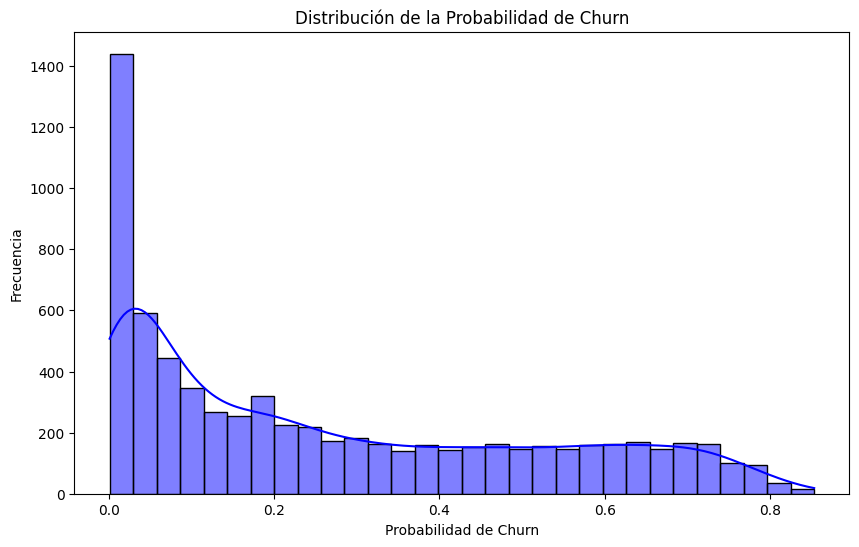

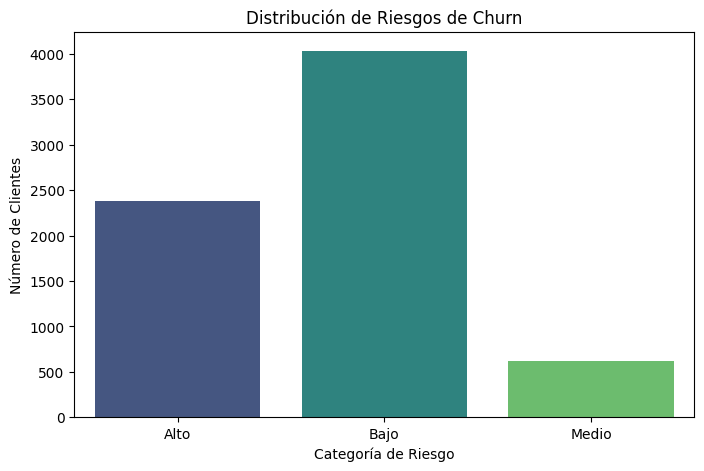

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de la distribución de la probabilidad de churn
plt.figure(figsize=(10, 6))
sns.histplot(df_without_churn['Probabilidad_Churn'], bins=30, kde=True, color='blue')
plt.title('Distribución de la Probabilidad de Churn')
plt.xlabel('Probabilidad de Churn')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico de distribución de riesgos (Alto, Medio, Bajo)
plt.figure(figsize=(8, 5))
sns.countplot(data=df_without_churn, x='Riesgo_Churn', palette='viridis', hue='Riesgo_Churn', legend=False)
plt.title('Distribución de Riesgos de Churn')
plt.xlabel('Categoría de Riesgo')
plt.ylabel('Número de Clientes')
plt.show()


# 🔍 **Comparación con el Dataset Original**

En esta sección, compararemos las **predicciones** del modelo con la **columna `Churn`** original del dataset para ver qué tan bien ha funcionado el modelo.

### **Cómo Comparar**

Convertimos las categorías de riesgo (**Alto**, **Medio**, **Bajo**) a 1 y 0, donde:
- **1**: Indica que el cliente está en riesgo alto de churn.
- **0**: Indica que el cliente no está en riesgo alto de churn.

Luego, calcularemos varias métricas de desempeño como **precisión**, **recall**, **F1-score** y **AUC-ROC**.

### **Métricas a Evaluar**:
- **Precisión**: ¿Cuántas de las predicciones positivas fueron realmente positivas?
- **Recall**: ¿Cuántos de los clientes que realmente desertaron fueron identificados correctamente?
- **F1-score**: La media armónica de precisión y recall.
- **Matriz de confusión**: Para evaluar los **True Positives (TP)**, **True Negatives (TN)**, **False Positives (FP)** y **False Negatives (FN)**.
- **AUC-ROC**: ¿Qué tan bien puede el modelo distinguir entre clientes que desertaron y los que no lo hicieron?

Estas métricas nos ayudarán a evaluar si la regresión logística fue efectiva para predecir el churn.


In [28]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Agregar la columna 'Churn' real al DataFrame para la comparación
df_without_churn['Churn_Real'] = df['Churn']

# Convertir 'Yes'/'No' a 1/0 en la columna Churn_Real
df_without_churn['Churn_Real'] = df_without_churn['Churn_Real'].map({'Yes': 1, 'No': 0})

# Convertir las probabilidades de churn a categorías con los umbrales especificados:
# 0.35: Alto riesgo, 0.25-0.35: Medio riesgo, 0.25: Bajo riesgo

def clasificar_riesgo(probabilidad):
    if probabilidad > 0.35:
        return 'Alto'
    elif probabilidad > 0.25:
        return 'Medio'
    else:
        return 'Bajo'

# Aplicar la función a la columna de probabilidad de churn
df_without_churn['Riesgo_Churn'] = df_without_churn['Probabilidad_Churn'].apply(clasificar_riesgo)

# Convertir 'Alto' a 1 (churn) y 'Bajo' y 'Medio' a 0 (no churn)
df_without_churn['Predicción_Churn'] = df_without_churn['Riesgo_Churn'].map({'Alto': 1, 'Medio': 0, 'Bajo': 0})

# Generar reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(df_without_churn['Churn_Real'], df_without_churn['Predicción_Churn']))

# Matriz de confusión
print("Matriz de confusión:")
print(confusion_matrix(df_without_churn['Churn_Real'], df_without_churn['Predicción_Churn']))

# AUC-ROC
roc_auc = roc_auc_score(df_without_churn['Churn_Real'], df_without_churn['Probabilidad_Churn'])
print(f"AUC-ROC: {roc_auc}")


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.89      0.80      0.84      5174
           1       0.56      0.72      0.63      1869

    accuracy                           0.78      7043
   macro avg       0.73      0.76      0.74      7043
weighted avg       0.80      0.78      0.79      7043

Matriz de confusión:
[[4134 1040]
 [ 527 1342]]
AUC-ROC: 0.8477399550743802


# 📝 **Conclusión del Análisis de Predicción de Churn con Regresión Logística**

En este notebook, hemos construido y evaluado un modelo de **Regresión Logística** para predecir el **churn** de clientes en una empresa de telecomunicaciones, utilizando el dataset **Telco-Customer-Churn**.

### **Resultados Clave**:

- **Precisión**: El modelo ha mostrado una precisión de **0.89** en predecir a los clientes que no desertarán (**No Churn**), mientras que la precisión para predecir a los clientes que desertarán (**Churn**) es de **0.56**.
  
- **Recall**: El recall para los clientes con churn es de **0.72**, lo que indica que el modelo es bastante efectivo para identificar a los clientes que abandonarán el servicio.

- **AUC-ROC**: El valor de **AUC-ROC** es **0.85**, lo que sugiere que el modelo tiene una excelente capacidad para distinguir entre clientes que desertan y aquellos que no lo hacen.

- **Matriz de Confusión**: La matriz muestra que el modelo ha identificado correctamente un buen número de clientes en riesgo de churn, pero también presenta algunos **false positives** y **false negatives**.

### **Próximos Pasos**:

1. **Acción sobre los resultados**: Usaremos estos resultados para **enfocar las estrategias de retención** hacia los clientes con alto riesgo de churn.
   
2. **Posibles mejoras en el modelo**: Aunque el modelo ya proporciona buenos resultados, podrían explorarse otros algoritmos o técnicas (como **XGBoost** o **Random Forest**) para mejorar las predicciones, especialmente para los clientes con churn.

3. **Aplicación práctica**: El modelo entrenado y las predicciones obtenidas permitirán tomar **decisiones informadas** sobre la retención de clientes y la asignación de recursos.

Con este análisis, hemos logrado identificar los clientes en riesgo de abandonar el servicio, y podemos tomar medidas proactivas para mejorar la satisfacción y fidelización de los mismos.

---

**¡Fin del análisis de predicción de churn con regresión logística!**
